In [6]:
from actiongraph import ActionGraph
import matplotlib.pyplot as plt
import networkx as nx
import json

In [3]:
graph = ActionGraph(chemicals=["H2", "O2", "N2"])
graph.add_chemical("CO2", node_id="co2")
graph.add_step("chem_0", "chem_1", "mix and heat")
graph.add_step("chem_1", "co2", "combine with carbon")
graph.connect_output("Final Product")

'output'

In [8]:
print(json.dumps(graph.serialize(), indent=2))

{
  "directed": true,
  "multigraph": false,
  "graph": {},
  "nodes": [
    {
      "type": "chemical",
      "data": "H2",
      "id": "chem_0"
    },
    {
      "type": "chemical",
      "data": "O2",
      "id": "chem_1"
    },
    {
      "type": "chemical",
      "data": "N2",
      "id": "chem_2"
    },
    {
      "type": "chemical",
      "data": "CO2",
      "id": "co2"
    },
    {
      "type": "output",
      "data": "Final Product",
      "id": "output"
    }
  ],
  "links": [
    {
      "step": "mix and heat",
      "source": "chem_0",
      "target": "chem_1"
    },
    {
      "step": "combine with carbon",
      "source": "chem_1",
      "target": "co2"
    },
    {
      "step": "finalize",
      "source": "chem_2",
      "target": "output"
    },
    {
      "step": "finalize",
      "source": "co2",
      "target": "output"
    }
  ]
}


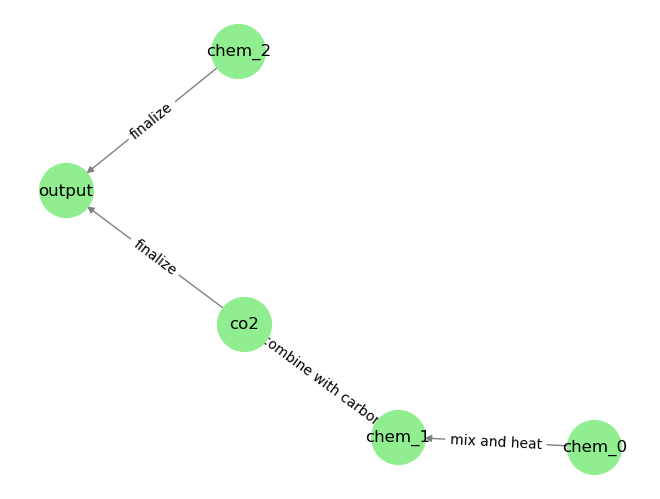

In [10]:
pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels=True, node_color='lightgreen', edge_color='gray', node_size=1500, arrows=True)
edge_labels = nx.get_edge_attributes(graph, 'step')
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)
plt.show()